In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import missingno

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [6]:
data = pd.read_csv('/content/drive/MyDrive/ML_Practice/04_covid_amz_ml/data.csv')
data.head()

,product,name,mrp_now,price_now,star1,star2,star3,star4,star5,mrp_then,price_then
0,facemasks,SURGICOMFORT Non Woven Elastic Ear-Loop Dispos...,1000.0,151.0,24.0,9.0,13.0,14.0,24.0,NaN,NaN
1,facemasks,Mediweave Reusable 100% Cotton Cloth Face Mask...,499.0,324.0,27.0,12.0,15.0,17.0,27.0,NaN,NaN
2,facemasks,RSM 3 Layer Non-Woven Disposable Medical Face ...,349.0,249.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,facemasks,Steelbird SBA-2 7Wings Unisex Helmet Visor Fac...,898.0,799.0,61.0,3.0,6.0,25.0,61.0,NaN,NaN
4,facemasks,Vocado 5 Layer Filter Protection Face Mask Kn9...,399.0,121.0,19.0,11.0,14.0,16.0,19.0,NaN,NaN


In [7]:
data.shape

(536, 11)

### 타겟데이터 설정
별점 기반 고객 선호도 데이터 생성

In [8]:
buyability=[]
for i in range(data.shape[0]):
    # 행별로 별점 개수에 가중치를 곱한 후 그 값을 더해줌 > 행별 선호도를 확인할 수 있음
    averaged_score = (data['star1'][i]*(1/15))+(data['star2'][i]*(2/15))+(data['star3'][i]*(3/15))+(data['star4'][i]*(4/15))+(data['star5'][i]*(5/15))
    try:
        averaged_score=int(averaged_score)
    except:
        averaged_score=0
    buyability.append(averaged_score)

data['buyability']=buyability
# buyability 값을 타겟값으로 설정

In [11]:
data.head()

,product,name,mrp_now,price_now,star1,star2,star3,star4,star5,mrp_then,price_then,buyability
0,facemasks,SURGICOMFORT Non Woven Elastic Ear-Loop Dispos...,1000.0,151.0,24.0,9.0,13.0,14.0,24.0,NaN,NaN,17
1,facemasks,Mediweave Reusable 100% Cotton Cloth Face Mask...,499.0,324.0,27.0,12.0,15.0,17.0,27.0,NaN,NaN,19
2,facemasks,RSM 3 Layer Non-Woven Disposable Medical Face ...,349.0,249.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
3,facemasks,Steelbird SBA-2 7Wings Unisex Helmet Visor Fac...,898.0,799.0,61.0,3.0,6.0,25.0,61.0,NaN,NaN,32
4,facemasks,Vocado 5 Layer Filter Protection Face Mask Kn9...,399.0,121.0,19.0,11.0,14.0,16.0,19.0,NaN,NaN,16


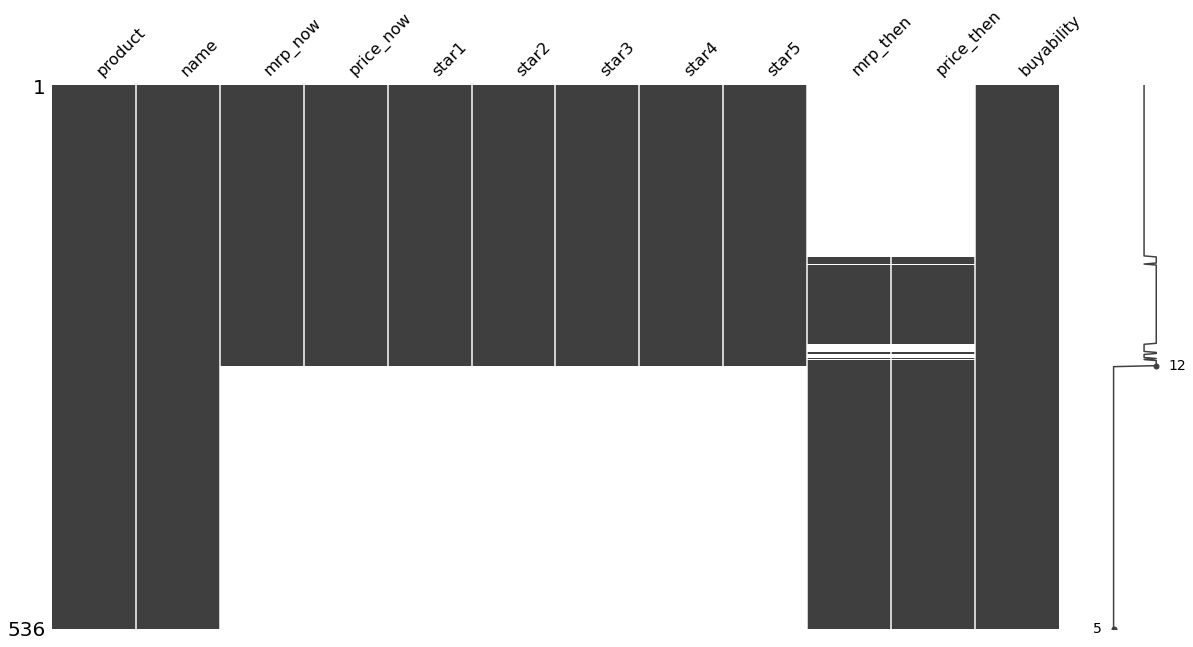

In [14]:
missingno.matrix(data,figsize=(20,10))

In [16]:
data = data.fillna(0)
data.isna().sum()

product       0
name          0
mrp_now       0
price_now     0
star1         0
star2         0
star3         0
star4         0
star5         0
mrp_then      0
price_then    0
buyability    0
dtype: int64

### 데이터 분리

In [22]:
X = data.iloc[:,2:-1]
y = data.iloc[:,-1]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2022)
X_train.shape, X_test.shape

((375, 9), (161, 9))

### 로지스틱 회귀

In [25]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8198757763975155


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### SVM

In [26]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_train[:5]

array([[ 0.72910763,  1.11624084, -0.45709381, -0.28927319, -0.40954072,
        -0.45576991, -0.45709381, -0.32886117, -0.39472778],
       [-0.44607669, -0.4006438 , -0.45709381, -0.28927319, -0.40954072,
        -0.45576991, -0.45709381,  1.25371589,  0.84636306],
       [-0.44607669, -0.4006438 , -0.45709381, -0.28927319, -0.40954072,
        -0.45576991, -0.45709381, -0.24988268, -0.27111514],
       [ 0.27767039,  0.81256023, -0.45709381, -0.28927319, -0.40954072,
        -0.45576991, -0.45709381, -0.20224234, -0.2214715 ],
       [-0.44607669, -0.4006438 , -0.45709381, -0.28927319, -0.40954072,
        -0.45576991, -0.45709381,  0.6999168 ,  1.44208666]])

In [31]:
for m in ('linear','poly','rbf','sigmoid'):
  clf = svm.SVC(kernel=m)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_train)
  print(m)
  print(accuracy_score(y_train,y_pred))
  print('----'*25)

linear
0.9333333333333333
----------------------------------------------------------------------------------------------------
poly
0.944
----------------------------------------------------------------------------------------------------
rbf
0.8746666666666667
----------------------------------------------------------------------------------------------------
sigmoid
0.8186666666666667
----------------------------------------------------------------------------------------------------


#### best model : poly

In [33]:
clf = svm.SVC(kernel='poly')
clf.fit(X_train,y_train)

# test 데이터도 스케일링
X_test = ss.transform(X_test)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.84472049689441
